In [4]:
artist = "the weeknd"
song_name = "the hills"

In [5]:
import lyricwikia
import re
import io
import matplotlib.pyplot as plt
import pandas as pd
try:
    # Find Lyrics by changing the artist name and song name
    lyrics = lyricwikia.get_lyrics(artist, song_name)
except:
    print("Lyrics Not Found")
# Remove Commas
lyrics = re.sub(r"/[.,\s]/g", "", lyrics)
lyrics = re.sub(",", "", lyrics)
# Replace - by space

# print(lyrics)

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
num_positive = 0
num_negative = 0
num_neutral = 0
sid = SentimentIntensityAnalyzer()
f = io.StringIO(lyrics)
for sentence in f.readlines():
        this_sentence = sentence
        comp = sid.polarity_scores(this_sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

num_total = num_negative + num_neutral + num_positive
percent_negative = (num_negative/float(num_total))*100
percent_neutral = (num_neutral/float(num_total))*100
percent_positive = (num_positive/float(num_total))*100
print(percent_positive)
df = pd.DataFrame(columns=('Song', 'pos', 'neu', 'neg'))

# df.plot.bar(x='artist', stacked=True)
# plt.show()          


11.76470588235294


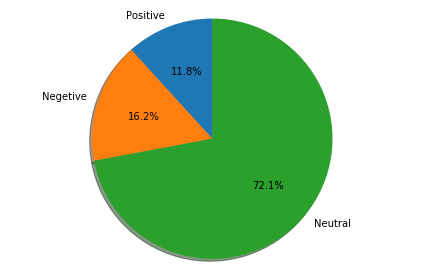

In [7]:
# Pie Chart
labels = ['Positive', 'Negetive', 'Neutral']
sizes = [percent_positive, percent_negative, percent_neutral]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()